# 1. 실습. Linear Regression : 보스턴 집값

In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline
warnings.filterwarnings('ignore')

# boston 데이터셋 로드
boston = load_boston()
# boston 데이터셋 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
# boston dataset의 target array는 주택 가격, PRICE 컬럼으로 DataFrame에 존재
bostonDF['PRICE'] = boston.target
print(bostonDF.shape)
bostonDF.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


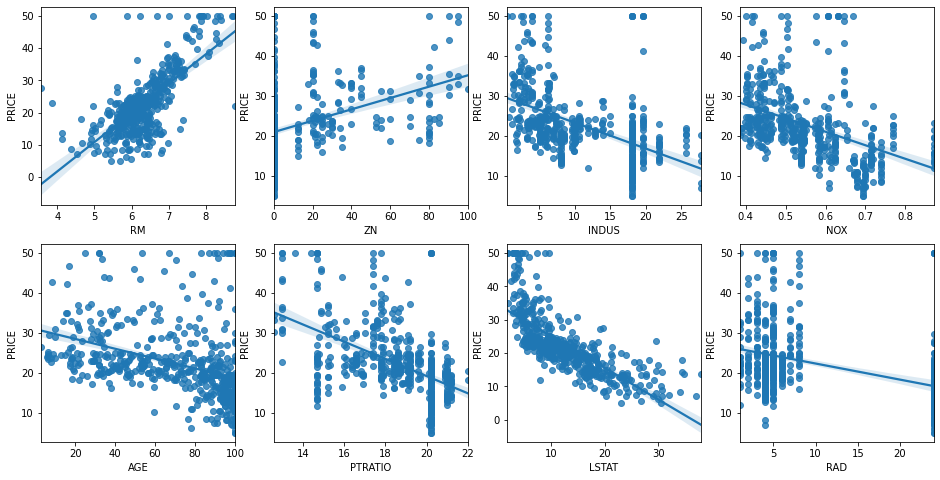

In [2]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# data split
y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'],axis=1, inplace=False)
X_train, X_test, y_train, y_test= train_test_split(X_data, y_target, test_size=0.3,random_state=156)

# model training
lr=LinearRegression()
lr.fit(X_train, y_train)
y_preds=lr.predict(X_test)

# 평가
mse=mean_squared_error(y_test, y_preds)
rmse=np.sqrt(mse)
print('MSE: {0:3f}, RMSE:{1:3F}'.format(mse, rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE: 17.296916, RMSE:4.158956
Variance score: 0.757


In [4]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_,1))

절편 값: 40.995595172165
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [5]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [6]:
from sklearn.model_selection import cross_val_score

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE : 5.829


In [7]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_preds = rf.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 7.353, RMSE : 2.712
Variance score : 0.897


## 1.2 상관관계 히트맵
- sns.heatmap() 에더해 해과 열별로 비슷한 항목을 묶어준다(clustering)
- -> sns.clustermap()

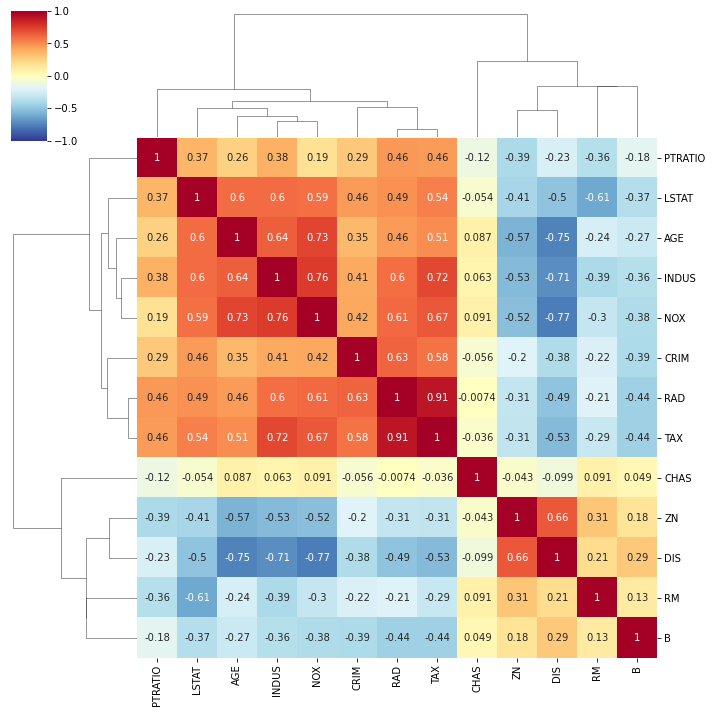

In [13]:
import seaborn as sns

X_data=bostonDF.drop(['PRICE'],axis=1, inplace=False)
df_corr = X_data.corr()
sns.clustermap(df_corr,
                annot = True,
                cmap = "RdYlBu_r",
                vmin = -1, vmax = 1)


삼각형plot(중복제외)

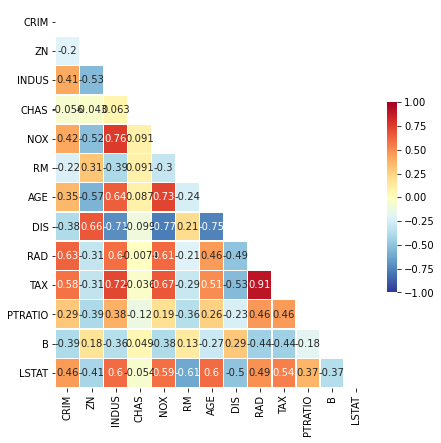

In [14]:
X_data=bostonDF.drop(['PRICE'],axis=1, inplace=False)
df_corr = X_data.corr()

# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(7,7) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df_corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
            )  
plt.show()

feature importans

In [15]:
from sklearn.ensemble import RandomForestRegressor

y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'],axis=1, inplace=False)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.feature_importances_
# 5번째 "RM"이 가장 중요함을 알 수 있음

array([0.03259972, 0.00142991, 0.00867356, 0.00069595, 0.01833392,
       0.36049905, 0.01578467, 0.06899079, 0.00285418, 0.01657216,
       0.01397485, 0.01403219, 0.44555904])